## <font color=red>BY PRINCE K


# <center> <font color=red> Task-2: LOAN PREDICTION

### About Dataset
#### Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this hackathon, we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.

#### To solve this problem, MachineHack has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The hackathon demands a few pre-requisite skills like big datasets, underfitting vs overfitting, and the ability to optimize “log_loss” to generalize well on unseen data.

In [3]:
train = pd.read_csv("/kaggle/input/loandefault/train.csv")
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
train.shape


(67463, 35)

In [5]:
test = pd.read_csv("/kaggle/input/loandefault/test.csv")
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [6]:
test.shape

(28913, 35)

In [7]:
rows=test.shape[0]+train.shape[0]
rows

96376

In [8]:
train.shape[0]/rows,test.shape[0]/rows

(0.6999979247945547, 0.30000207520544536)

In [9]:
df = pd.concat([train,test],axis=0)
df.shape

(96376, 35)

In [10]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0


In [11]:
df['Batch Enrolled'].nunique()

41

In [12]:
df = df.drop(['ID','Payment Plan'],axis=1)
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0


In [13]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [14]:
# numerical columns

num = df.select_dtypes(include=np.number).columns
len(num)

25

In [15]:
for i in num:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in Loan Amount are:  29737
The no.of unique values in Funded Amount are:  26793
The no.of unique values in Funded Amount Investor are:  89848
The no.of unique values in Term are:  4
The no.of unique values in Interest Rate are:  89117
The no.of unique values in Home Ownership are:  89998
The no.of unique values in Debit to Income are:  91895
The no.of unique values in Delinquency - two years are:  10
The no.of unique values in Inquires - six months are:  6
The no.of unique values in Open Account are:  36
The no.of unique values in Public Record are:  5
The no.of unique values in Revolving Balance are:  24628
The no.of unique values in Revolving Utilities are:  89948
The no.of unique values in Total Accounts are:  70
The no.of unique values in Total Received Interest are:  96014
The no.of unique values in Total Received Late Fee are:  88877
The no.of unique values in Recoveries are:  88961
The no.of unique values in Collection Recovery Fee are:  88861
The no.of u

In [16]:
df[['Term','Inquires - six months','Public Record','Collection 12 months Medical','Accounts Delinquent']]=df[['Term','Inquires - six months','Public Record','Collection 12 months Medical','Accounts Delinquent']].astype('object')

In [17]:
num = df.select_dtypes(include=np.number).columns
len(num)

20

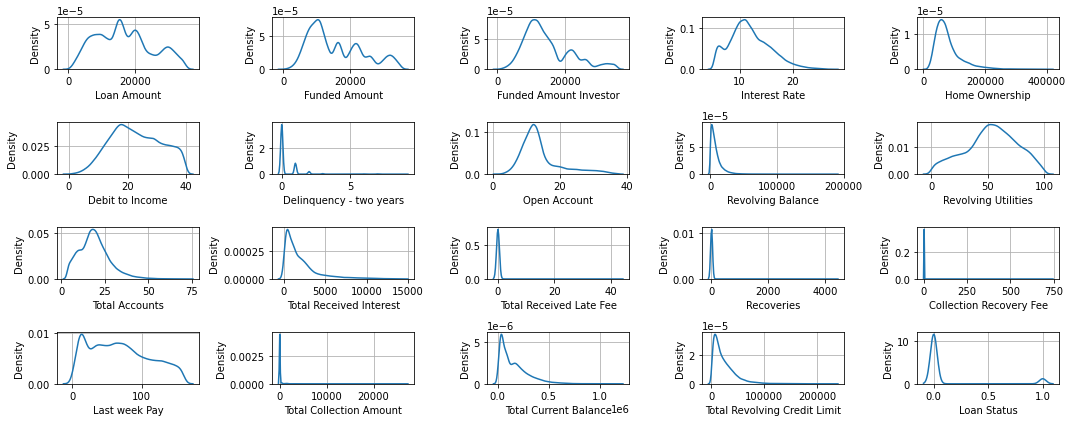

In [18]:
r=5
c=5
it=1
for i in num:
    plt.subplot(r,c,it)
    sns.distplot(df.loc[:,i],hist=False)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [19]:
# categorical data

cat = df.select_dtypes(include='object').columns
len(cat)

13

In [20]:
for i in cat:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in Term are:  4
The no.of unique values in Batch Enrolled are:  41
The no.of unique values in Grade are:  7
The no.of unique values in Sub Grade are:  35
The no.of unique values in Employment Duration are:  3
The no.of unique values in Verification Status are:  3
The no.of unique values in Loan Title are:  109
The no.of unique values in Inquires - six months are:  6
The no.of unique values in Public Record are:  5
The no.of unique values in Initial List Status are:  2
The no.of unique values in Collection 12 months Medical are:  2
The no.of unique values in Application Type are:  2
The no.of unique values in Accounts Delinquent are:  2


In [21]:
cat 

Index(['Term', 'Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Loan Title', 'Inquires - six months',
       'Public Record', 'Initial List Status', 'Collection 12 months Medical',
       'Application Type', 'Accounts Delinquent'],
      dtype='object')

In [22]:
new_cat = ['Term', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status','Inquires - six months',
       'Public Record', 'Initial List Status', 'Collection 12 months Medical',
       'Application Type', 'Accounts Delinquent']
len(new_cat)

11

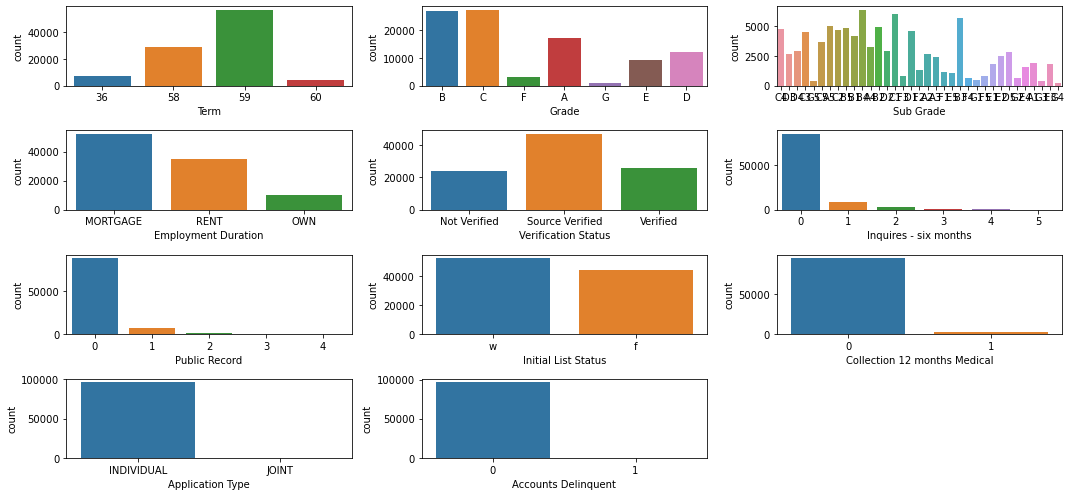

In [23]:
r=4
c=3
it=1
for i in new_cat:
    plt.subplot(r,c,it)
    sns.countplot(x=df.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

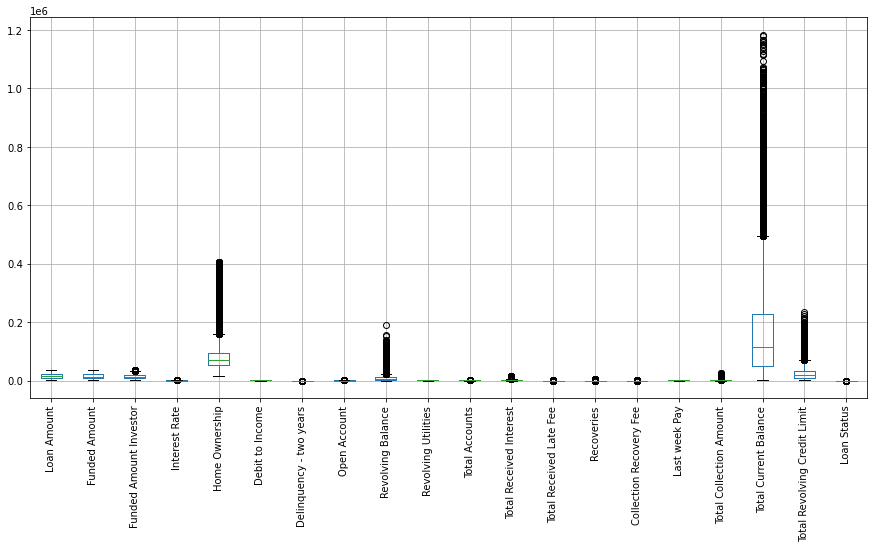

In [24]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# Encoding

In [25]:
y = df['Loan Status']
x = df.drop('Loan Status',axis=1)

In [26]:
# numerical columns
x_num = x.select_dtypes(include=np.number)
x_num.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,13,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,49,31,311301,6619
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,12,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,109,53,182610,20885
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,14,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,66,34,89801,26155
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,7,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,39,40,9189,60214
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,13,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,18,430,126029,22579


In [27]:
# categorical columns
x_cat = x.select_dtypes(include='object')
x_cat.head()

,Term,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Inquires - six months,Public Record,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent
0,59,BAT2522922,B,C4,MORTGAGE,Not Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
1,59,BAT1586599,C,D3,RENT,Source Verified,Debt consolidation,0,0,f,0,INDIVIDUAL,0
2,59,BAT2136391,F,D4,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
3,59,BAT2428731,C,C3,MORTGAGE,Source Verified,Debt consolidation,0,0,w,0,INDIVIDUAL,0
4,59,BAT5341619,C,D4,MORTGAGE,Source Verified,Credit card refinancing,3,1,w,0,INDIVIDUAL,0


In [28]:
x_cat['Loan Title']=x_cat['Loan Title'].apply(lambda x: 'Debt Consolidation' if x.lower()=='debt consolidation' else x) 

In [29]:
x_cat['Loan Title']=x_cat['Loan Title'].apply(lambda x: 'Credit Card Refinancing' if x.lower()=='credit card refinancing' else x) 

In [30]:
x_cat['Loan Title'].unique()

array(['Debt Consolidation', 'Credit Card Refinancing',
       'Home improvement', 'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'Home Improvement', 'Refinance', 'credit card consolidation',
       'Lending Club', 'Debt Consolidation Loan', 'Major purchase',
       'Vacation', 'Business', 'Credit card payoff',
       'Credit Card Consolidation', 'credit card', 'Credit Card Refi',
       'Personal Loan', 'CC Refi', 'consolidate', 'Medical', 'Loan 1',
       'Consolidation', 'Card Consolidation', 'Car financing', 'debt',
       'home improvement', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 2013',
       'debt loan', 'CC Refinance', 'Consolidation Loan', 'Home',
       

In [31]:
def change_attribute(x):
        if x=='Debt Consolidation' or x=='Credit Card Refinancing':
            return x
        else:
            return 'Other Purpose'
        
    

In [32]:
x_cat['Loan Title']=x_cat['Loan Title'].apply(change_attribute)

In [33]:
x_cat['Loan Title'].unique()

array(['Debt Consolidation', 'Credit Card Refinancing', 'Other Purpose'],
      dtype=object)

In [34]:
for i in x_cat.columns:
    print("The no.of unique values in",i,"are: ",x_cat.loc[:,i].nunique())

The no.of unique values in Term are:  4
The no.of unique values in Batch Enrolled are:  41
The no.of unique values in Grade are:  7
The no.of unique values in Sub Grade are:  35
The no.of unique values in Employment Duration are:  3
The no.of unique values in Verification Status are:  3
The no.of unique values in Loan Title are:  3
The no.of unique values in Inquires - six months are:  6
The no.of unique values in Public Record are:  5
The no.of unique values in Initial List Status are:  2
The no.of unique values in Collection 12 months Medical are:  2
The no.of unique values in Application Type are:  2
The no.of unique values in Accounts Delinquent are:  2


In [35]:
x_cat['Sub Grade']=x_cat['Sub Grade'].map(x_cat['Sub Grade'].value_counts(normalize=True))
x_cat.head()

,Term,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Inquires - six months,Public Record,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent
0,59,BAT2522922,B,0.049245,MORTGAGE,Not Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
1,59,BAT1586599,C,0.027413,RENT,Source Verified,Debt Consolidation,0,0,f,0,INDIVIDUAL,0
2,59,BAT2136391,F,0.030495,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
3,59,BAT2428731,C,0.046775,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
4,59,BAT5341619,C,0.030495,MORTGAGE,Source Verified,Credit Card Refinancing,3,1,w,0,INDIVIDUAL,0


In [36]:
x_cat=x_cat.drop('Batch Enrolled',axis=1)
x_cat.head()

,Term,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Inquires - six months,Public Record,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent
0,59,B,0.049245,MORTGAGE,Not Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
1,59,C,0.027413,RENT,Source Verified,Debt Consolidation,0,0,f,0,INDIVIDUAL,0
2,59,F,0.030495,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
3,59,C,0.046775,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
4,59,C,0.030495,MORTGAGE,Source Verified,Credit Card Refinancing,3,1,w,0,INDIVIDUAL,0


In [37]:
for i in x_cat.columns:
    print("The no.of unique values in",i,"are: ",x_cat.loc[:,i].nunique())

The no.of unique values in Term are:  4
The no.of unique values in Grade are:  7
The no.of unique values in Sub Grade are:  35
The no.of unique values in Employment Duration are:  3
The no.of unique values in Verification Status are:  3
The no.of unique values in Loan Title are:  3
The no.of unique values in Inquires - six months are:  6
The no.of unique values in Public Record are:  5
The no.of unique values in Initial List Status are:  2
The no.of unique values in Collection 12 months Medical are:  2
The no.of unique values in Application Type are:  2
The no.of unique values in Accounts Delinquent are:  2


In [38]:
x_cat['Grade']=x_cat['Grade'].map(x_cat['Grade'].value_counts(normalize=True))
x_cat.head()

,Term,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Inquires - six months,Public Record,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent
0,59,0.277434,0.049245,MORTGAGE,Not Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
1,59,0.282114,0.027413,RENT,Source Verified,Debt Consolidation,0,0,f,0,INDIVIDUAL,0
2,59,0.032456,0.030495,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
3,59,0.282114,0.046775,MORTGAGE,Source Verified,Debt Consolidation,0,0,w,0,INDIVIDUAL,0
4,59,0.282114,0.030495,MORTGAGE,Source Verified,Credit Card Refinancing,3,1,w,0,INDIVIDUAL,0


In [39]:
x_cat['Grade'].value_counts()

0.282114    27189
0.277434    26738
0.178198    17174
0.126702    12211
0.093945     9054
0.032456     3128
0.009152      882
Name: Grade, dtype: int64

In [40]:
x_cat['Initial List Status'] = x_cat['Initial List Status'].replace({'w':1,'f':0})
x_cat['Initial List Status'].head()

0    1
1    0
2    1
3    1
4    1
Name: Initial List Status, dtype: int64

In [41]:
x_cat['Application Type'] = x_cat['Application Type'].replace({'INDIVIDUAL':0,'JOINT':1})

In [42]:
x_cat['Verification Status'].value_counts()

Source Verified    46662
Verified           26059
Not Verified       23655
Name: Verification Status, dtype: int64

In [43]:
x_cat.head()

,Term,Grade,Sub Grade,Employment Duration,Verification Status,Loan Title,Inquires - six months,Public Record,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent
0,59,0.277434,0.049245,MORTGAGE,Not Verified,Debt Consolidation,0,0,1,0,0,0
1,59,0.282114,0.027413,RENT,Source Verified,Debt Consolidation,0,0,0,0,0,0
2,59,0.032456,0.030495,MORTGAGE,Source Verified,Debt Consolidation,0,0,1,0,0,0
3,59,0.282114,0.046775,MORTGAGE,Source Verified,Debt Consolidation,0,0,1,0,0,0
4,59,0.282114,0.030495,MORTGAGE,Source Verified,Credit Card Refinancing,3,1,1,0,0,0


In [44]:
a=pd.get_dummies(x_cat[['Term','Employment Duration','Verification Status','Loan Title','Inquires - six months','Public Record']],drop_first=True)
a

,Term_58,Term_59,Term_60,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Source Verified,Verification Status_Verified,Loan Title_Debt Consolidation,Loan Title_Other Purpose,Inquires - six months_1,Inquires - six months_2,Inquires - six months_3,Inquires - six months_4,Inquires - six months_5,Public Record_1,Public Record_2,Public Record_3,Public Record_4
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
28909,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
28910,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
28911,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [45]:
x_cat = x_cat.drop(['Term','Employment Duration','Verification Status','Loan Title','Inquires - six months','Public Record'],axis=1)
x_cat

,Grade,Sub Grade,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent
0,0.277434,0.049245,1,0,0,0
1,0.282114,0.027413,0,0,0,0
2,0.032456,0.030495,1,0,0,0
3,0.282114,0.046775,1,0,0,0
4,0.282114,0.030495,1,0,0,0
...,...,...,...,...,...,...
28908,0.282114,0.037727,0,0,0,0
28909,0.282114,0.046775,0,0,0,0
28910,0.126702,0.029198,0,1,0,0
28911,0.126702,0.048114,0,0,0,0


In [46]:
x_cat2 = pd.concat([x_cat,a],axis=1)
x_cat2.head()

,Grade,Sub Grade,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent,Term_58,Term_59,Term_60,Employment Duration_OWN,...,Loan Title_Other Purpose,Inquires - six months_1,Inquires - six months_2,Inquires - six months_3,Inquires - six months_4,Inquires - six months_5,Public Record_1,Public Record_2,Public Record_3,Public Record_4
0,0.277434,0.049245,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.282114,0.027413,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.032456,0.030495,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.282114,0.046775,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.282114,0.030495,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [47]:
x_cat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96376 entries, 0 to 28912
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Grade                                96376 non-null  float64
 1   Sub Grade                            96376 non-null  float64
 2   Initial List Status                  96376 non-null  int64  
 3   Collection 12 months Medical         96376 non-null  object 
 4   Application Type                     96376 non-null  int64  
 5   Accounts Delinquent                  96376 non-null  object 
 6   Term_58                              96376 non-null  uint8  
 7   Term_59                              96376 non-null  uint8  
 8   Term_60                              96376 non-null  uint8  
 9   Employment Duration_OWN              96376 non-null  uint8  
 10  Employment Duration_RENT             96376 non-null  uint8  
 11  Verification Status_Source V

In [48]:
#x_cat2['Collection 12 months Medical'] = x_cat2['Collection 12 months Medical'].astype('int')

In [49]:
#x_cat2['Accounts Delinquent'] = x_cat2['Accounts Delinquent'].astype('int')

In [50]:
x_cat2.columns

Index(['Grade', 'Sub Grade', 'Initial List Status',
       'Collection 12 months Medical', 'Application Type',
       'Accounts Delinquent', 'Term_58', 'Term_59', 'Term_60',
       'Employment Duration_OWN', 'Employment Duration_RENT',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Loan Title_Debt Consolidation', 'Loan Title_Other Purpose',
       'Inquires - six months_1', 'Inquires - six months_2',
       'Inquires - six months_3', 'Inquires - six months_4',
       'Inquires - six months_5', 'Public Record_1', 'Public Record_2',
       'Public Record_3', 'Public Record_4'],
      dtype='object')

In [51]:
x_cat2[['Term_58', 'Term_59', 'Term_60',
       'Employment Duration_OWN', 'Employment Duration_RENT',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Loan Title_Debt Consolidation', 'Loan Title_Other Purpose',
       'Inquires - six months_1', 'Inquires - six months_2',
       'Inquires - six months_3', 'Inquires - six months_4',
       'Inquires - six months_5', 'Public Record_1', 'Public Record_2',
       'Public Record_3', 'Public Record_4']]=x_cat2[['Term_58', 'Term_59', 'Term_60',
       'Employment Duration_OWN', 'Employment Duration_RENT',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Loan Title_Debt Consolidation', 'Loan Title_Other Purpose',
       'Inquires - six months_1', 'Inquires - six months_2',
       'Inquires - six months_3', 'Inquires - six months_4',
       'Inquires - six months_5', 'Public Record_1', 'Public Record_2',
       'Public Record_3', 'Public Record_4']].astype('int')

In [52]:
x_cat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96376 entries, 0 to 28912
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Grade                                96376 non-null  float64
 1   Sub Grade                            96376 non-null  float64
 2   Initial List Status                  96376 non-null  int64  
 3   Collection 12 months Medical         96376 non-null  object 
 4   Application Type                     96376 non-null  int64  
 5   Accounts Delinquent                  96376 non-null  object 
 6   Term_58                              96376 non-null  int64  
 7   Term_59                              96376 non-null  int64  
 8   Term_60                              96376 non-null  int64  
 9   Employment Duration_OWN              96376 non-null  int64  
 10  Employment Duration_RENT             96376 non-null  int64  
 11  Verification Status_Source V

**Standardizing the numerical columns:**

In [53]:
x_num.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,10000,32236,12329.36286,11.135007,176346.62670,16.284758,1,13,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,49,31,311301,6619
1,3609,11940,12191.99692,12.237563,39833.92100,15.412409,0,12,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,109,53,182610,20885
2,28276,9311,21603.22455,12.545884,91506.69105,28.137619,0,14,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,66,34,89801,26155
3,11170,6954,17877.15585,16.731201,108286.57590,18.043730,1,7,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,39,40,9189,60214
4,16890,13226,13539.92667,15.008300,44234.82545,17.209886,1,13,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,18,430,126029,22579


In [54]:
rs = RobustScaler()

In [55]:
x_num = pd.DataFrame(rs.fit_transform(x_num),columns=x_num.columns)
x_num.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Open Account,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,-0.494173,1.534519,-0.057866,-0.067255,2.480360,-0.453543,1.0,0.166667,2.247271,0.669462,-1.000000,0.799089,1.174345,-0.137250,0.092709,-0.231884,-0.12,1.098588,-0.444785
1,-1.025240,-0.090982,-0.073871,0.153106,-0.680332,-0.519360,0.0,0.000000,-0.619186,0.778634,-0.454545,-0.254492,-0.062484,-0.167486,0.367344,0.637681,0.76,0.375906,0.145860
2,1.024493,-0.301538,1.022671,0.214728,0.516053,0.440736,0.0,0.333333,-0.493074,-1.694603,0.181818,-0.210258,351.840216,0.316751,0.435971,0.014493,0.00,-0.145277,0.364050
3,-0.396950,-0.490309,0.588531,1.051221,0.904559,-0.320831,1.0,-0.833333,0.971836,0.427259,-0.545455,-0.491205,0.086787,-0.734415,0.026358,-0.376812,0.24,-0.597965,1.774171
4,0.078360,0.012013,0.083182,0.706875,-0.578438,-0.383743,1.0,0.166667,-0.529647,1.004256,0.363636,-0.568841,361.753516,322.590290,-0.551457,-0.681159,15.84,0.058167,0.215996


**Concatenating the encoded and standardised columns**

In [56]:
x_cat2.shape

(96376, 24)

In [57]:
x_num.shape

(96376, 19)

In [58]:
x_num = x_num.reset_index()

In [59]:
x_cat2 = x_cat2.reset_index()

In [60]:
x = pd.concat([x_cat2,x_num],axis=1)
x

,index,Grade,Sub Grade,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent,Term_58,Term_59,Term_60,...,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,0,0.277434,0.049245,1,0,0,0,0,1,0,...,0.669462,-1.000000,0.799089,1.174345,-0.137250,0.092709,-0.231884,-0.12,1.098588,-0.444785
1,1,0.282114,0.027413,0,0,0,0,0,1,0,...,0.778634,-0.454545,-0.254492,-0.062484,-0.167486,0.367344,0.637681,0.76,0.375906,0.145860
2,2,0.032456,0.030495,1,0,0,0,0,1,0,...,-1.694603,0.181818,-0.210258,351.840216,0.316751,0.435971,0.014493,0.00,-0.145277,0.364050
3,3,0.282114,0.046775,1,0,0,0,0,1,0,...,0.427259,-0.545455,-0.491205,0.086787,-0.734415,0.026358,-0.376812,0.24,-0.597965,1.774171
4,4,0.282114,0.030495,1,0,0,0,0,1,0,...,1.004256,0.363636,-0.568841,361.753516,322.590290,-0.551457,-0.681159,15.84,0.058167,0.215996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96371,28908,0.282114,0.037727,0,0,0,0,0,0,1,...,0.580800,-0.181818,4.309607,-0.741810,-0.761141,-1.110975,0.637681,-1.36,4.314571,4.001035
96372,28909,0.282114,0.046775,0,0,0,0,0,0,1,...,-0.110319,0.727273,2.540163,-0.741810,-0.761141,-1.110975,0.565217,-1.36,2.236452,1.425812
96373,28910,0.126702,0.029198,0,1,0,0,0,0,1,...,-0.214150,2.454545,3.170902,-0.741810,-0.761141,-1.110975,0.260870,-1.36,1.014314,1.997164
96374,28911,0.126702,0.048114,0,0,0,0,0,0,1,...,0.957184,1.454545,2.061247,-0.741810,-0.761141,-1.110975,0.260870,-1.36,1.757988,0.539803


In [61]:
x.isnull().sum()

index                                  0
Grade                                  0
Sub Grade                              0
Initial List Status                    0
Collection 12 months Medical           0
Application Type                       0
Accounts Delinquent                    0
Term_58                                0
Term_59                                0
Term_60                                0
Employment Duration_OWN                0
Employment Duration_RENT               0
Verification Status_Source Verified    0
Verification Status_Verified           0
Loan Title_Debt Consolidation          0
Loan Title_Other Purpose               0
Inquires - six months_1                0
Inquires - six months_2                0
Inquires - six months_3                0
Inquires - six months_4                0
Inquires - six months_5                0
Public Record_1                        0
Public Record_2                        0
Public Record_3                        0
Public Record_4 

In [62]:
x = x.drop('index',axis=1)


In [63]:
x.shape

(96376, 43)

# Building the Base Model

In [64]:
xtrain = x[0:67463]
xtrain

,Grade,Sub Grade,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent,Term_58,Term_59,Term_60,Employment Duration_OWN,...,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,0.277434,0.049245,1,0,0,0,0,1,0,0,...,0.669462,-1.000000,0.799089,1.174345,-0.137250,0.092709,-0.231884,-0.12,1.098588,-0.444785
1,0.282114,0.027413,0,0,0,0,0,1,0,0,...,0.778634,-0.454545,-0.254492,-0.062484,-0.167486,0.367344,0.637681,0.76,0.375906,0.145860
2,0.032456,0.030495,1,0,0,0,0,1,0,0,...,-1.694603,0.181818,-0.210258,351.840216,0.316751,0.435971,0.014493,0.00,-0.145277,0.364050
3,0.282114,0.046775,1,0,0,0,0,1,0,0,...,0.427259,-0.545455,-0.491205,0.086787,-0.734415,0.026358,-0.376812,0.24,-0.597965,1.774171
4,0.282114,0.030495,1,0,0,0,0,1,0,0,...,1.004256,0.363636,-0.568841,361.753516,322.590290,-0.551457,-0.681159,15.84,0.058167,0.215996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,0.282114,0.034044,1,0,0,0,0,1,0,0,...,1.410771,0.090909,0.334695,-0.300999,140.238532,0.201148,0.057971,0.56,0.371216,0.701313
67459,0.282114,0.059226,1,0,0,0,0,1,0,0,...,-1.252752,-0.363636,0.882695,-0.233088,-0.257817,1.017236,-0.739130,0.12,-0.522137,-0.358047
67460,0.178198,0.008218,1,0,0,0,0,1,0,0,...,-1.713194,-0.818182,0.683002,-0.212119,0.655584,1.326185,1.043478,-0.68,0.343599,1.033733
67461,0.126702,0.019133,0,0,0,0,0,1,0,1,...,0.460158,-0.272727,1.155523,0.657134,-0.472093,-0.796136,0.115942,1.08,1.379584,0.898968


In [65]:
xtest = x[67463:]
xtest

,Grade,Sub Grade,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent,Term_58,Term_59,Term_60,Employment Duration_OWN,...,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
67463,0.178198,0.048114,0,0,0,0,0,1,0,0,...,0.421105,-1.181818,1.551245,0.911036,1.343005,-0.001203,1.014493,-0.40,2.020345,-0.538147
67464,0.277434,0.019133,1,0,0,0,0,1,0,0,...,0.552024,0.272727,-0.146472,0.032442,0.776431,0.394788,-0.130435,-1.32,-0.242927,-0.612299
67465,0.178198,0.046775,0,0,0,0,0,1,0,0,...,-0.110869,0.454545,-0.275817,-0.333529,0.663572,-0.683958,-0.898551,-0.32,0.949908,0.095805
67466,0.178198,0.027579,1,0,0,0,0,1,0,0,...,0.913351,0.909091,-0.282288,0.993032,-0.144393,0.343597,-0.637681,-0.08,-0.420213,-0.419654
67467,0.282114,0.059226,1,0,0,0,1,0,0,1,...,-0.169507,-0.818182,-0.510549,-0.547404,-0.229763,-0.500862,0.565217,-0.04,-0.139526,0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96371,0.282114,0.037727,0,0,0,0,0,0,1,0,...,0.580800,-0.181818,4.309607,-0.741810,-0.761141,-1.110975,0.637681,-1.36,4.314571,4.001035
96372,0.282114,0.046775,0,0,0,0,0,0,1,0,...,-0.110319,0.727273,2.540163,-0.741810,-0.761141,-1.110975,0.565217,-1.36,2.236452,1.425812
96373,0.126702,0.029198,0,1,0,0,0,0,1,0,...,-0.214150,2.454545,3.170902,-0.741810,-0.761141,-1.110975,0.260870,-1.36,1.014314,1.997164
96374,0.126702,0.048114,0,0,0,0,0,0,1,0,...,0.957184,1.454545,2.061247,-0.741810,-0.761141,-1.110975,0.260870,-1.36,1.757988,0.539803


In [66]:
ytrain = y[0:67463]
ytrain

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
67458    1.0
67459    0.0
67460    0.0
67461    0.0
67462    0.0
Name: Loan Status, Length: 67463, dtype: float64

In [67]:
ytest = y[67463:]
ytest

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
28908   NaN
28909   NaN
28910   NaN
28911   NaN
28912   NaN
Name: Loan Status, Length: 28913, dtype: float64

In [68]:
xc = sm.add_constant(xtrain)
xc.head()

,const,Grade,Sub Grade,Initial List Status,Collection 12 months Medical,Application Type,Accounts Delinquent,Term_58,Term_59,Term_60,...,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,1.0,0.277434,0.049245,1,0,0,0,0,1,0,...,0.669462,-1.000000,0.799089,1.174345,-0.137250,0.092709,-0.231884,-0.12,1.098588,-0.444785
1,1.0,0.282114,0.027413,0,0,0,0,0,1,0,...,0.778634,-0.454545,-0.254492,-0.062484,-0.167486,0.367344,0.637681,0.76,0.375906,0.145860
2,1.0,0.032456,0.030495,1,0,0,0,0,1,0,...,-1.694603,0.181818,-0.210258,351.840216,0.316751,0.435971,0.014493,0.00,-0.145277,0.364050
3,1.0,0.282114,0.046775,1,0,0,0,0,1,0,...,0.427259,-0.545455,-0.491205,0.086787,-0.734415,0.026358,-0.376812,0.24,-0.597965,1.774171
4,1.0,0.282114,0.030495,1,0,0,0,0,1,0,...,1.004256,0.363636,-0.568841,361.753516,322.590290,-0.551457,-0.681159,15.84,0.058167,0.215996


In [69]:
ytrain = ytrain.astype('int')

In [70]:
ytrain.value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

# Building Models

In [71]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]
train_acc = []
for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ypred_train = i_model.predict(xtrain)
    ypred_test = i_model.predict(xtest)
    train_acc.append(accuracy_score(ytrain,ypred_train))

In [72]:
train_acc

[0.9074900315728621,
 1.0,
 0.9999407082400723,
 0.9096541808102219,
 0.8781702562886323]

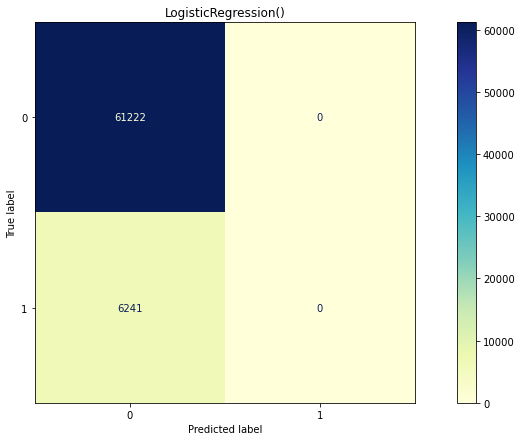

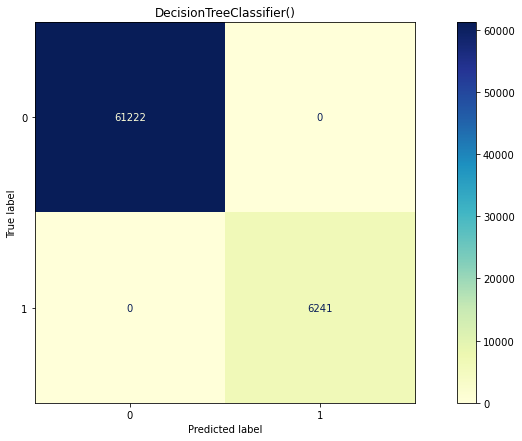

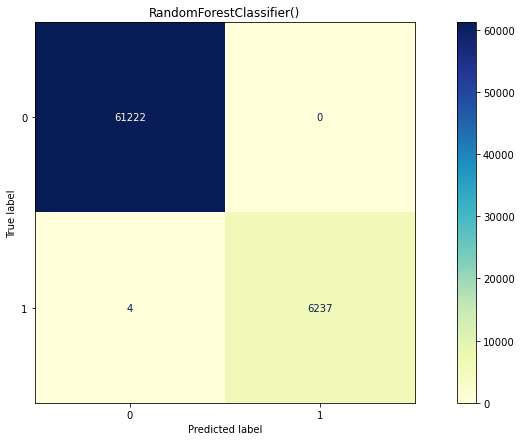

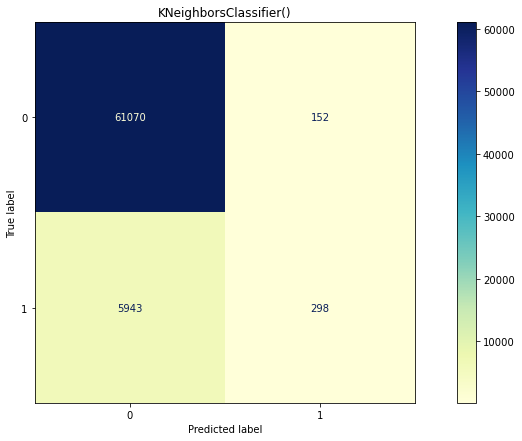

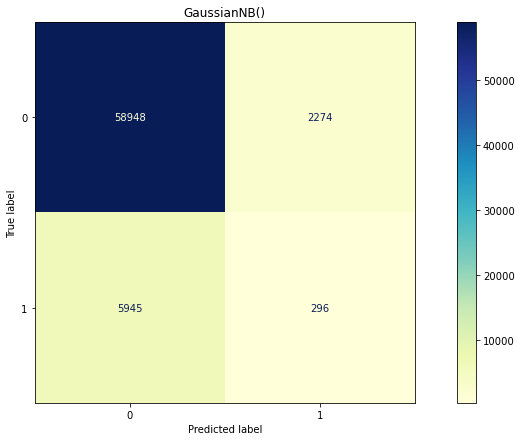

In [73]:
for i in model_list:
    plot_confusion_matrix(estimator=i,X=xtrain,y_true=ytrain,cmap='YlGnBu')
    plt.title(i)
plt.show()

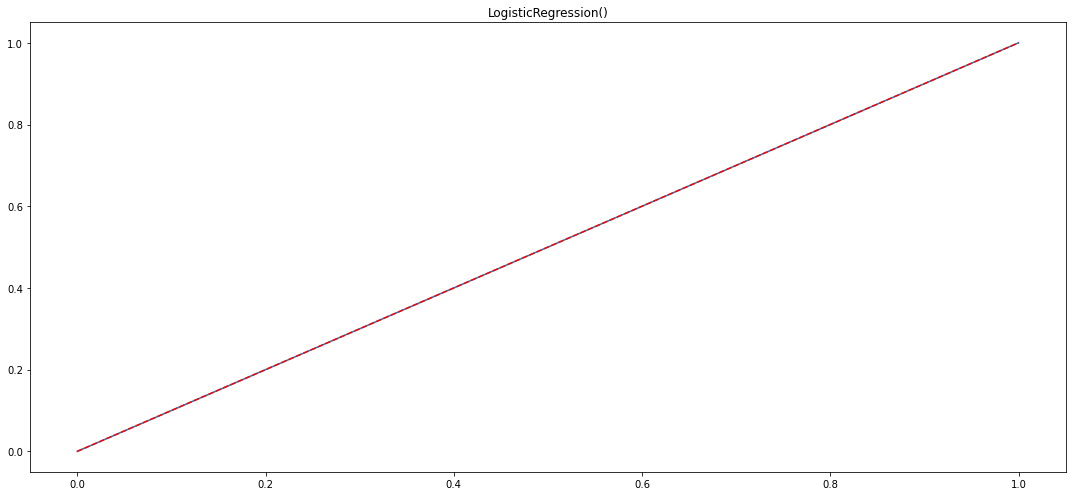

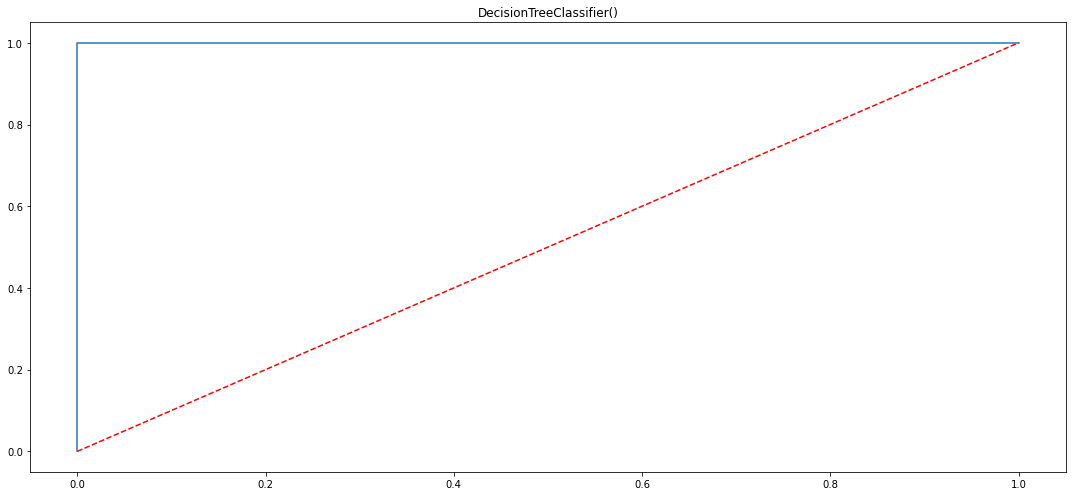

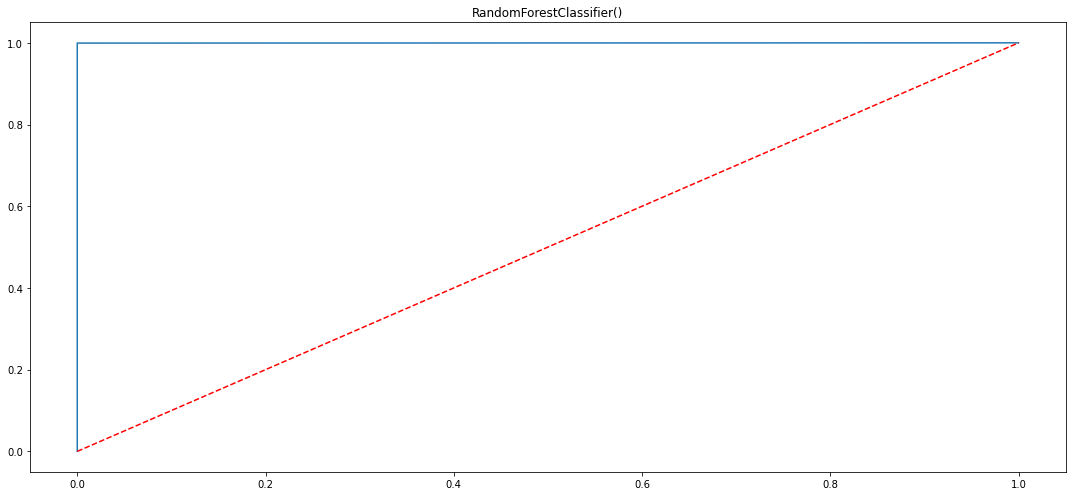

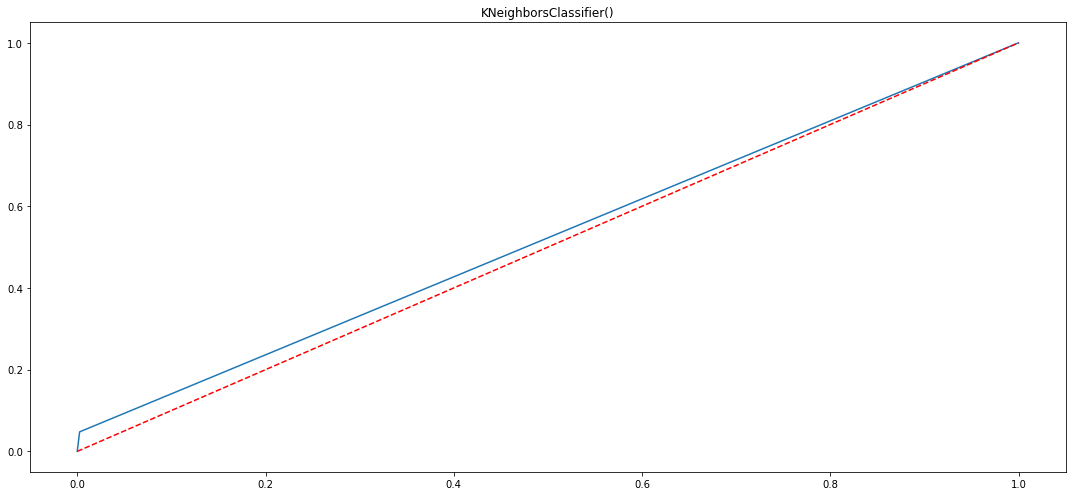

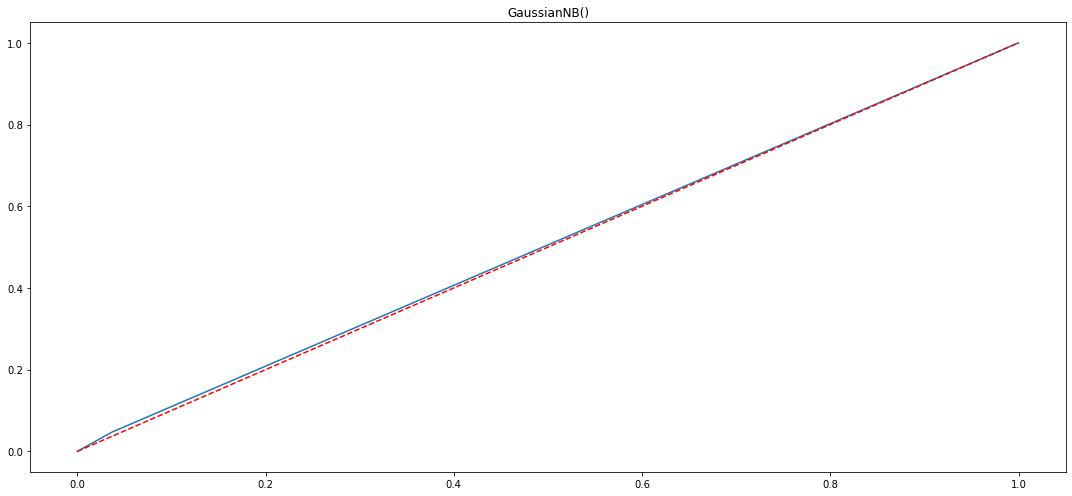

In [74]:
for i in model_list:
    fpr,tpr,thresholds=roc_curve(ytrain,i.predict(xtrain))
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.title(i)
    plt.tight_layout()
    plt.show()



# Feature Importances

In [75]:
rf_model=rf.fit(xtrain,ytrain)
rf_model.feature_importances_

array([2.03471864e-02, 3.49187562e-02, 6.50040148e-03, 2.30943638e-03,
       5.54330506e-04, 0.00000000e+00, 2.68676825e-03, 3.37672380e-03,
       0.00000000e+00, 4.73698667e-03, 7.15384791e-03, 6.99504730e-03,
       5.94201256e-03, 7.04596001e-03, 4.71000462e-03, 3.77598378e-03,
       2.75057989e-03, 1.05479050e-03, 5.24408158e-04, 2.99678455e-08,
       3.99536899e-03, 9.78412443e-04, 2.60162082e-04, 1.08263158e-03,
       5.11728337e-02, 4.95369772e-02, 5.12265264e-02, 5.10249292e-02,
       5.09572072e-02, 5.07380182e-02, 1.08674950e-02, 3.49420385e-02,
       4.93834996e-02, 4.99180023e-02, 3.95225139e-02, 5.03306233e-02,
       5.06467873e-02, 5.03628907e-02, 5.05914982e-02, 4.50698295e-02,
       4.15645791e-02, 5.06473303e-02, 4.97965910e-02])

In [76]:
importances=pd.DataFrame({'Features':xtrain.columns,'Feature Importances':rf_model.feature_importances_})
importances

,Features,Feature Importances
0,Grade,2.034719e-02
1,Sub Grade,3.491876e-02
2,Initial List Status,6.500401e-03
3,Collection 12 months Medical,2.309436e-03
4,Application Type,5.543305e-04
5,Accounts Delinquent,0.000000e+00
6,Term_58,2.686768e-03
7,Term_59,3.376724e-03
8,Term_60,0.000000e+00
9,Employment Duration_OWN,4.736987e-03


In [77]:
imp = importances.sort_values(by='Feature Importances',ascending=False)
imp

,Features,Feature Importances
26,Funded Amount Investor,5.122653e-02
24,Loan Amount,5.117283e-02
27,Interest Rate,5.102493e-02
28,Home Ownership,5.095721e-02
29,Debit to Income,5.073802e-02
41,Total Current Balance,5.064733e-02
36,Total Received Late Fee,5.064679e-02
38,Collection Recovery Fee,5.059150e-02
37,Recoveries,5.036289e-02
35,Total Received Interest,5.033062e-02


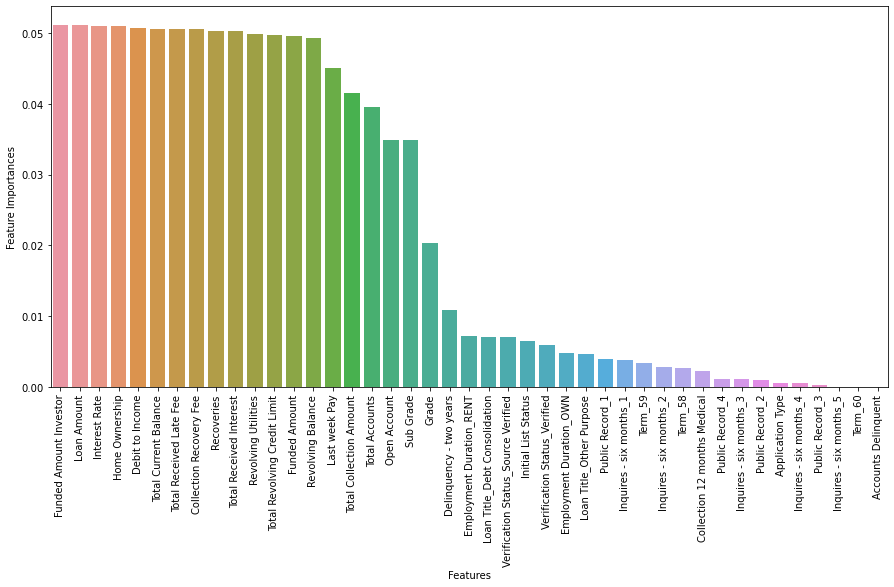

In [78]:
sns.barplot(y='Feature Importances',x='Features',data=imp)
plt.xticks(rotation=90)
plt.show()

In [79]:
# important features are:

imp['Features'].values[0:6]

array(['Funded Amount Investor', 'Loan Amount', 'Interest Rate',
       'Home Ownership', 'Debit to Income', 'Total Current Balance'],
      dtype=object)

**'Total Received Late Fee', 'Loan Amount', 'Home Ownership',
       'Interest Rate', 'Funded Amount Investor',
       'Collection Recovery Fee'** 
 are some of the important features which can affect loan default prediction